In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from string import ascii_letters

%matplotlib inline
plt.rc('font',family='Arial') 
plt.style.use('ggplot')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

font_T = fm.FontProperties(family='Arial', size=24, stretch=0, weight='bold')

In [2]:
df_heatmap = pd.read_csv('df_heatmap.csv')
df_heatmap

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,69.330000,0.000000,9.990000,6.320000,0.870000,3.930000,1.740000,3.870,0.000000,0.000,1.17,0.000000,0.00,0.39
1,74.380000,0.000000,8.780000,3.940000,0.555000,4.780000,1.080000,2.935,0.830000,1.430,0.68,0.050000,0.00,0.00
2,65.880000,0.000000,9.670000,7.120000,1.560000,6.440000,2.060000,2.180,0.000000,0.000,0.79,0.000000,0.00,0.36
3,61.580000,0.000000,10.950000,7.350000,1.770000,7.500000,2.620000,3.270,0.000000,0.000,0.94,0.060000,0.00,0.47
4,63.730000,0.000000,7.525000,2.705000,1.855000,10.600000,4.215000,2.345,0.275000,1.175,4.34,0.115000,0.00,0.00
5,66.650833,0.659330,8.336498,5.149310,0.837207,6.429294,1.751128,3.240,0.390539,0.000,0.61,0.039528,0.00,0.00
6,69.040833,0.723268,9.734919,5.094897,0.918394,6.200759,2.054456,1.550,0.428411,0.000,0.35,0.043361,0.00,0.00
7,70.790833,0.770085,10.656860,4.974552,0.977841,6.006685,2.106725,0.840,0.456141,0.000,0.00,0.046168,0.00,0.00
8,68.310833,0.703739,9.907996,5.074069,0.893597,6.208973,1.977624,1.650,0.416843,0.000,0.15,0.042191,0.00,0.00
9,59.010000,2.860000,12.530000,8.700000,0.000000,6.160000,2.880000,4.730,0.000000,0.000,1.27,0.000000,0.00,0.00


In [3]:
df_corr = df_heatmap.corr()
df_corr.loc[['SiO2'],:]

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
SiO2,1.0,-0.549612,-0.544338,-0.741328,0.152974,-0.645343,-0.406362,-0.261349,0.129012,0.422703,-0.078792,0.092957,0.567055,-0.227548


# 热力图

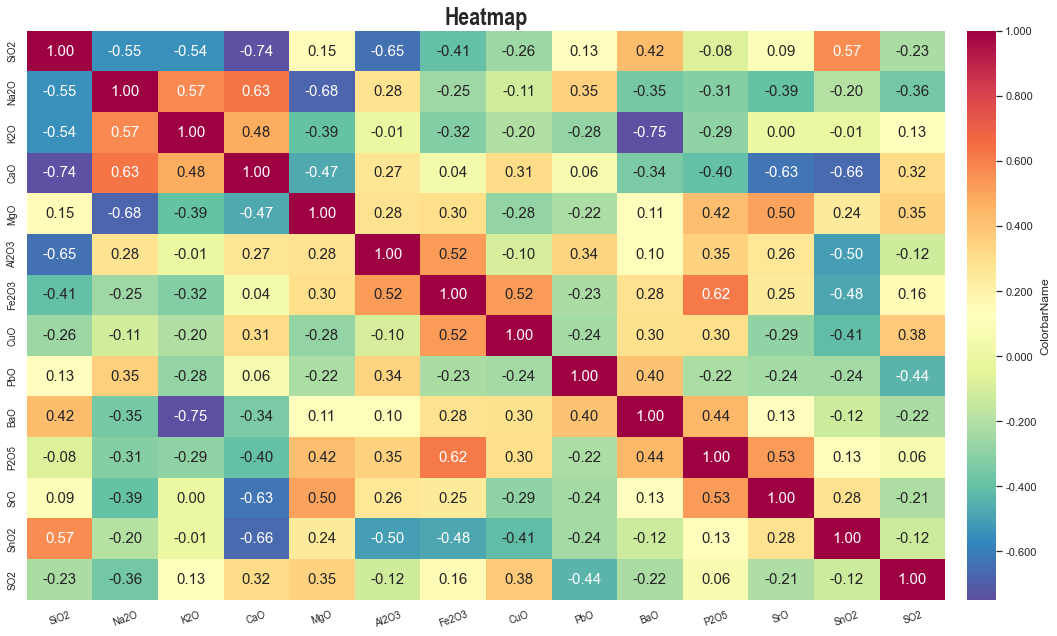

In [4]:
sns.set_theme(style='white')  
# 画图
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(df_corr,
            cmap=sns.color_palette('Spectral_r', as_cmap=True),
            annot=True,     # 控制是否有相关性系数
            fmt='.2f',      # 控制系数的小数点
            annot_kws={'family': 'Arial', 'size': 15, 'weight':'normal'},  # 控制系数的字体大小
            square=False,   # 控制是否为方形
            cbar=True,      # 控制是否有颜色条
            cbar_kws={'label': 'ColorbarName',       # color bar的名称
                      'orientation': 'vertical',   # color bar的方向设置，默认为'vertical'，可水平显示'horizontal'
                      'format': '%.3f',               # 格式化输出color bar中刻度值
                      'pad': 0.02,                    # color bar与热图之间距离，距离变大热图会被压缩
                      }
            # linewidths=.5,  # 每个方格外框显示，外框宽度设置
            )

# 添加标题
plt.title('Heatmap', 
          fontproperties=fm.FontProperties(family='Arial', size=24, stretch=0, weight='bold'))

# 坐标轴刻度字体
plt.xticks(fontproperties = fm.FontProperties(family='Arial', size=12, stretch=0))
plt.yticks(fontproperties = fm.FontProperties(family='Arial', size=12, stretch=0))

# 横纵坐标轴刻度值旋转
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.tight_layout()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# 单行热力图

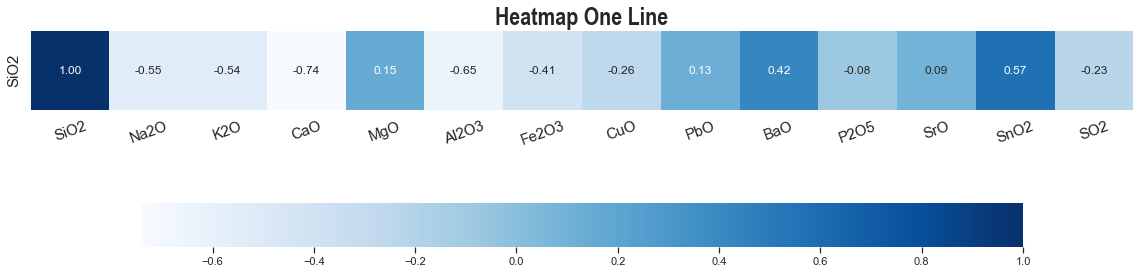

In [5]:
sns.set_theme(style='white')  
# 画图
fig, ax = plt.subplots(figsize=(16, 9))
# 输入数据仅一行相关系数
sns.heatmap(df_corr.loc[['SiO2'],:],
            cmap='Blues', fmt='.2f', annot_kws={'size': 12},
            annot=True, square=True,
            # 设置水平尺度条
            cbar_kws={'orientation': 'horizontal','shrink': 0.8})

# 添加标题
plt.title('Heatmap One Line', fontproperties = font_T)

# 坐标轴刻度字体
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.tight_layout()
plt.savefig('heatmap_one.png', dpi=300, bbox_inches='tight')

# 半个热力图

In [6]:
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

C:\Windows\Temp\ipykernel_52304\1766042422.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(df_corr,dtype=np.bool)),  # 显示对脚线下面部分图


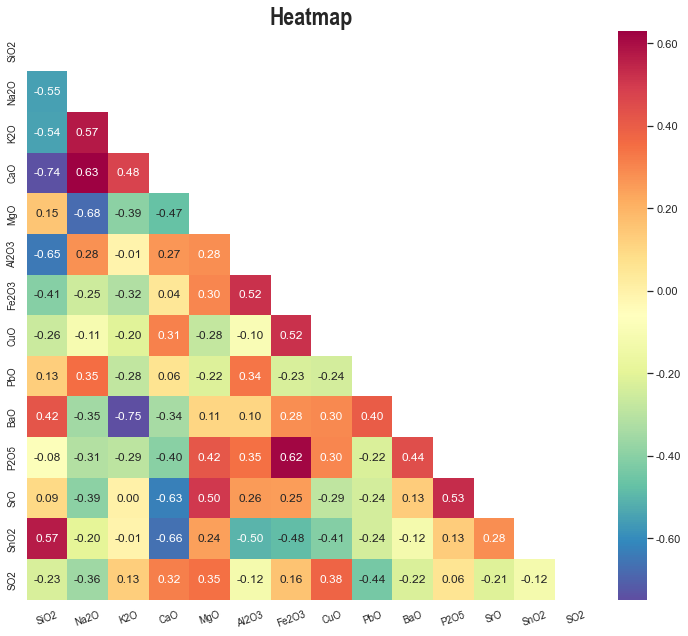

In [7]:
sns.set_theme(style='white')  
# 画图
fig, ax = plt.subplots(figsize=(16, 9))
# 输入数据仅一行相关系数
sns.heatmap(df_corr,
            cmap=sns.color_palette('Spectral_r', as_cmap=True),
            fmt='.2f',
            annot=True, 
            annot_kws={'size': 12},
            square=True,
            mask=np.triu(np.ones_like(df_corr,dtype=np.bool)),  # 显示对脚线下面部分图
            cbar_kws={
                      'orientation': 'vertical',   # color bar的方向设置，默认为'vertical'，可水平显示'horizontal'
                      'format': '%.2f',              # 格式化输出color bar中刻度值
                      'pad': 0.02,                    # color bar与热图之间距离，距离变大热图会被压缩
            }
            )

# 添加标题
plt.title('Heatmap', 
          fontproperties=fm.FontProperties(family='Arial', size=24, stretch=0, weight='bold'))

# 坐标轴刻度字体
plt.xticks(fontproperties = fm.FontProperties(family='Arial', size=12, stretch=0))
plt.yticks(fontproperties = fm.FontProperties(family='Arial', size=12, stretch=0))

# 横纵坐标轴刻度值旋转
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.tight_layout()
plt.savefig('heatmap_half.png', dpi=300, bbox_inches='tight')


# 聚类热力图

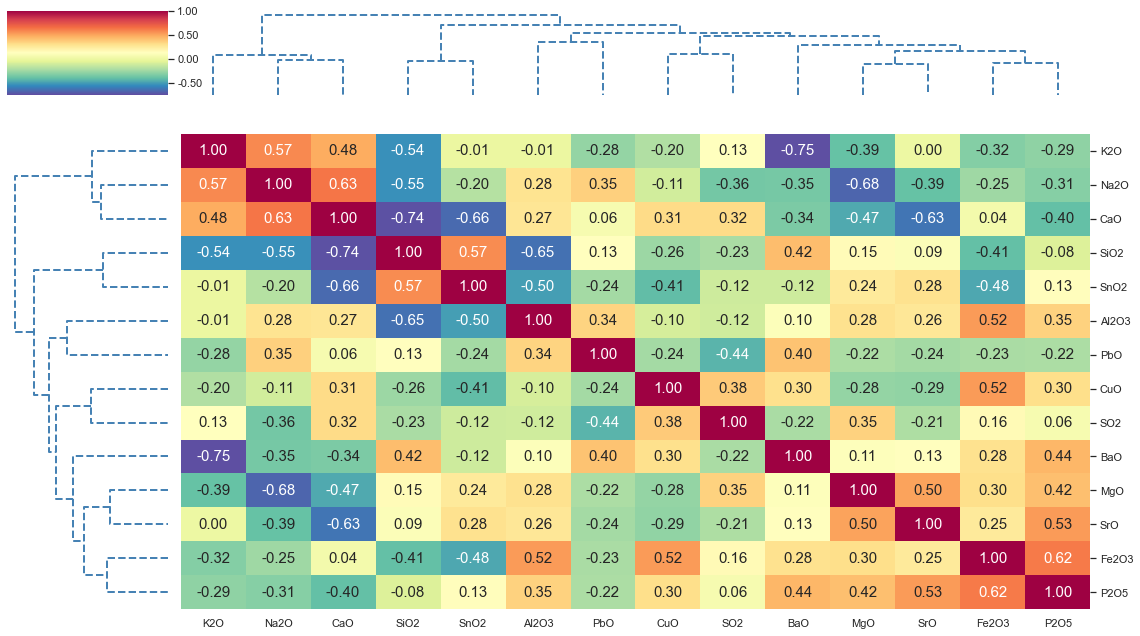

In [15]:
row_c = dict(zip(list(ascii_letters[len(df_corr.columns):]), plt.get_cmap('RdPu')(np.linspace(0, 1, 26))))
index_c = dict(zip(list(ascii_letters[len(df_corr.columns):]), plt.get_cmap('RdPu')(np.linspace(0, 1, 26))))

# 画图
sns.set_theme(style='white')  
ax = sns.clustermap(df_corr,
                    figsize=(16, 9),
                    method='average',   # average算法
                    metric='euclidean', # 欧式距离euclidean

                    row_cluster=True,   # 行方向不聚类
                    col_cluster=True,   # 列方向聚类

                    cmap=sns.color_palette('Spectral_r', as_cmap=True),

                    annot=True,         # 控制是否有相关性系数
                    fmt='.2f',          # 控制系数的小数点
                    annot_kws={'family': 'Arial', 'size': 15,
                               'weight': 'normal'},  # 控制系数的字体大小

                    square=False,       # 控制是否为方形

                    tree_kws={'linestyles': 'dashed',  # 线型
                              'colors': 'steelblue',   # 线色
                              'linewidths': 2},        # 线宽
                    dendrogram_ratio=0.15,  # 图放大缩小

                    cbar_kws={
                        'orientation': 'vertical',   # color bar的方向设置，默认为'vertical'，可水平显示'horizontal'
                        'format': '%.2f',              # 格式化输出color bar中刻度值
                        'pad': 0.02,                    # color bar与热图之间距离，距离变大热图会被压缩
                    }
                    )

plt.tight_layout()
plt.savefig('heatmap_cluster.png', dpi=300, bbox_inches='tight')
